In [1]:
import os
import sys
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import matplotlib.colors as colors
path = os.path.dirname(os.getcwd())

sys.path.append(path)
from kepler_apertures import KeplerPSF

In [76]:
ch = 15
psf = KeplerPSF(quarter=5, channel=ch, plot=False, save=False)

Will query with this (ra, dec, radius, epoch):  [281.2544635] [47.50320044] [1.2725540244921485] 2010.3025748712942
Loading query from file...
../data/catalogs/5/channel_15_gaia_xmatch.csv
Cleaning sources table...
Saturated pixels 3046
Bright pixels 37661
Total Gaia sources 6296


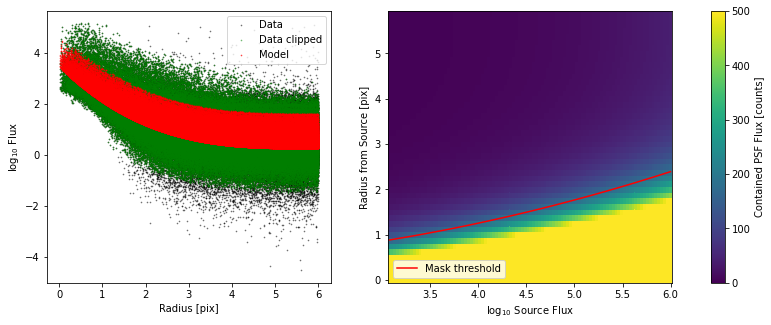

In [93]:
psf.show = True
psf.plot = True
psf.save = False
radius = psf._find_psf_edge(psf.r, psf.dflux, psf.gf, 
                            radius_limit=6.0, 
                            cut=200, dm_type="cubic")

In [189]:
np.arange(4, 21, 2)

array([ 4,  6,  8, 10, 12, 14, 16, 18, 20])

In [195]:
rknots = np.arange(4, 9, 1)
phiknots = np.arange(6, 25, 2)
psfs = []
for i, nr in enumerate(rknots):
    print(nr)
    aux = []
    for j, nphi in enumerate(phiknots):
        data = psf._build_psf_model(psf.r, psf.phi, psf.dflux, 
                             gf, radius * 2, 
                             psf.dx, psf.dy,
                             rknots=nr,
                             phiknots=nphi)
        aux.append(data)
    psfs.append(aux)

4
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
5
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
6
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
7
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# Contaminated pixels:  50997
# 

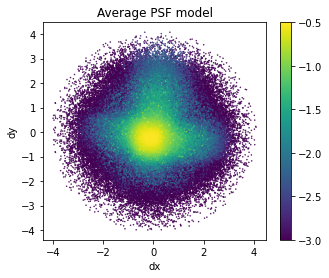

In [196]:
fig, ax = plt.subplots(1, figsize=(5, 4))

x = psfs[-1][-1]["x_data"]
y = psfs[-1][-1]["y_data"]
f = psfs[-1][-1]["f_data"]
mask = psfs[-1][-1]["clip_mask"]

cax = ax.scatter(x[mask], 
                 y[mask], 
                 c=np.log10(f[mask]), 
                 marker=".", 
                 s=1, vmin=-3, vmax=-0.5)
fig.colorbar(cax, ax=ax)
ax.set_xlabel("dx")
ax.set_ylabel("dy")
ax.set_title("Average PSF model")

plt.show()

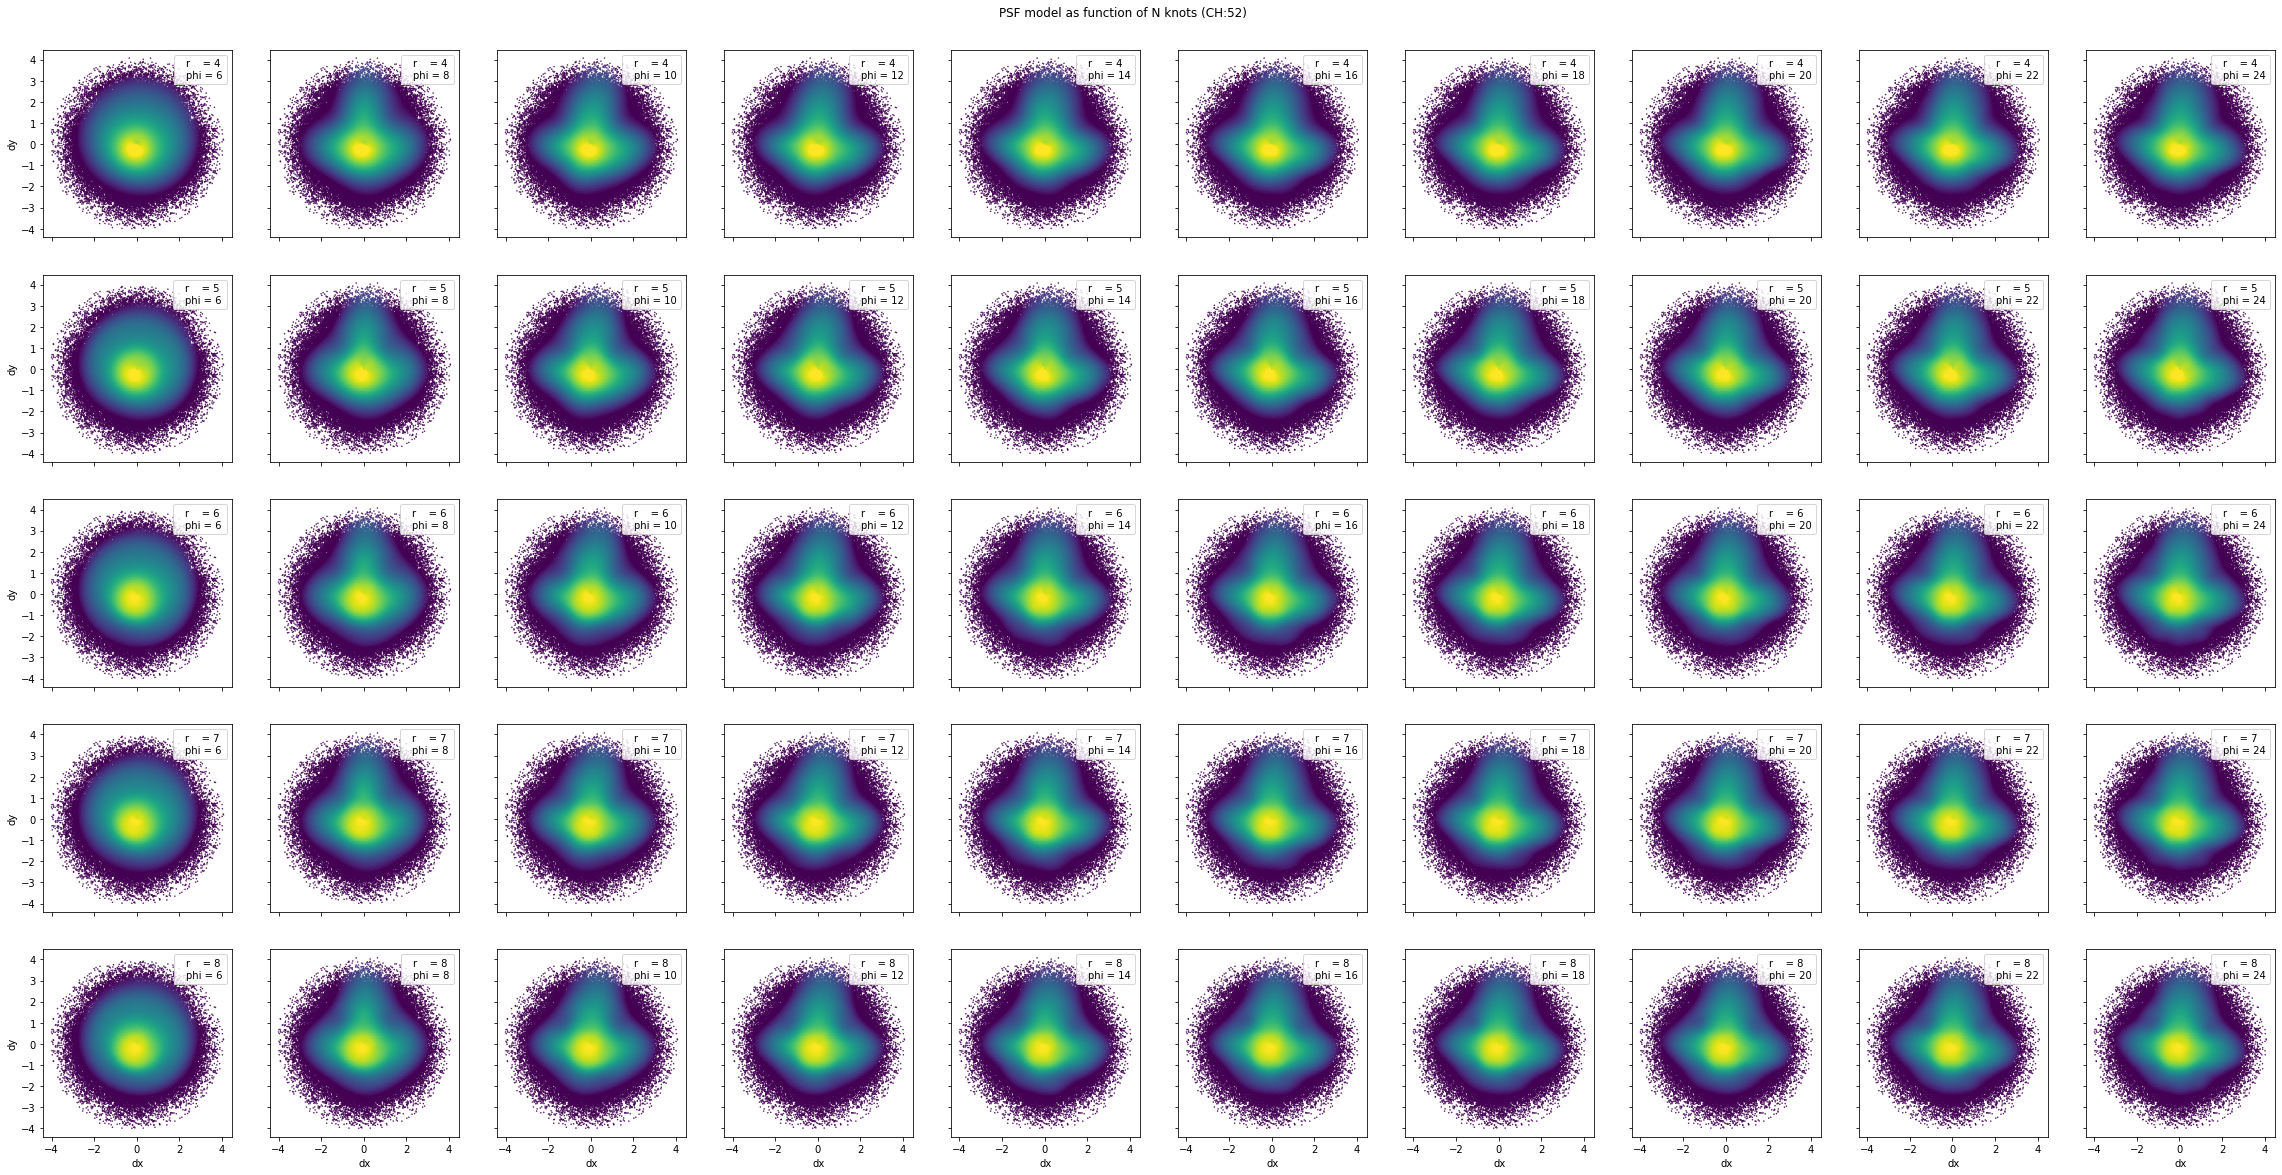

In [204]:
fig, ax = plt.subplots(len(rknots), len(phiknots), 
                       figsize=(len(rknots)*8, 2*len(phiknots)),
                       sharex=True, sharey=True)
fig.suptitle("PSF model as function of N knots (CH:52)", x=0.5, y=0.91)

for row in range(len(rknots)):
    for col in range(len(phiknots)):
        mask = psfs[row][col]['clip_mask']
        cax = ax[row, col].scatter(
                psfs[row][col]['x_data'][mask],
                psfs[row][col]['y_data'][mask],
                c=np.log10(psfs[row][col]['f_model'][mask]),
                marker=".",
                s=1,
                vmin=-3,
                vmax=-0.5,
                label='r    = %i \nphi = %i' % (rknots[row], phiknots[col]),
            )
        ax[row, col].legend(frameon=True, loc="upper right", markerscale=0, handlelength=0)
        if col == 0:
            ax[row, col].set_ylabel('dy')
        if row == len(rknots) - 1:
            ax[row, col].set_xlabel('dx')


#fig.colorbar(cax, ax=ax[1, len(phiknots) - 1])
plt.show()

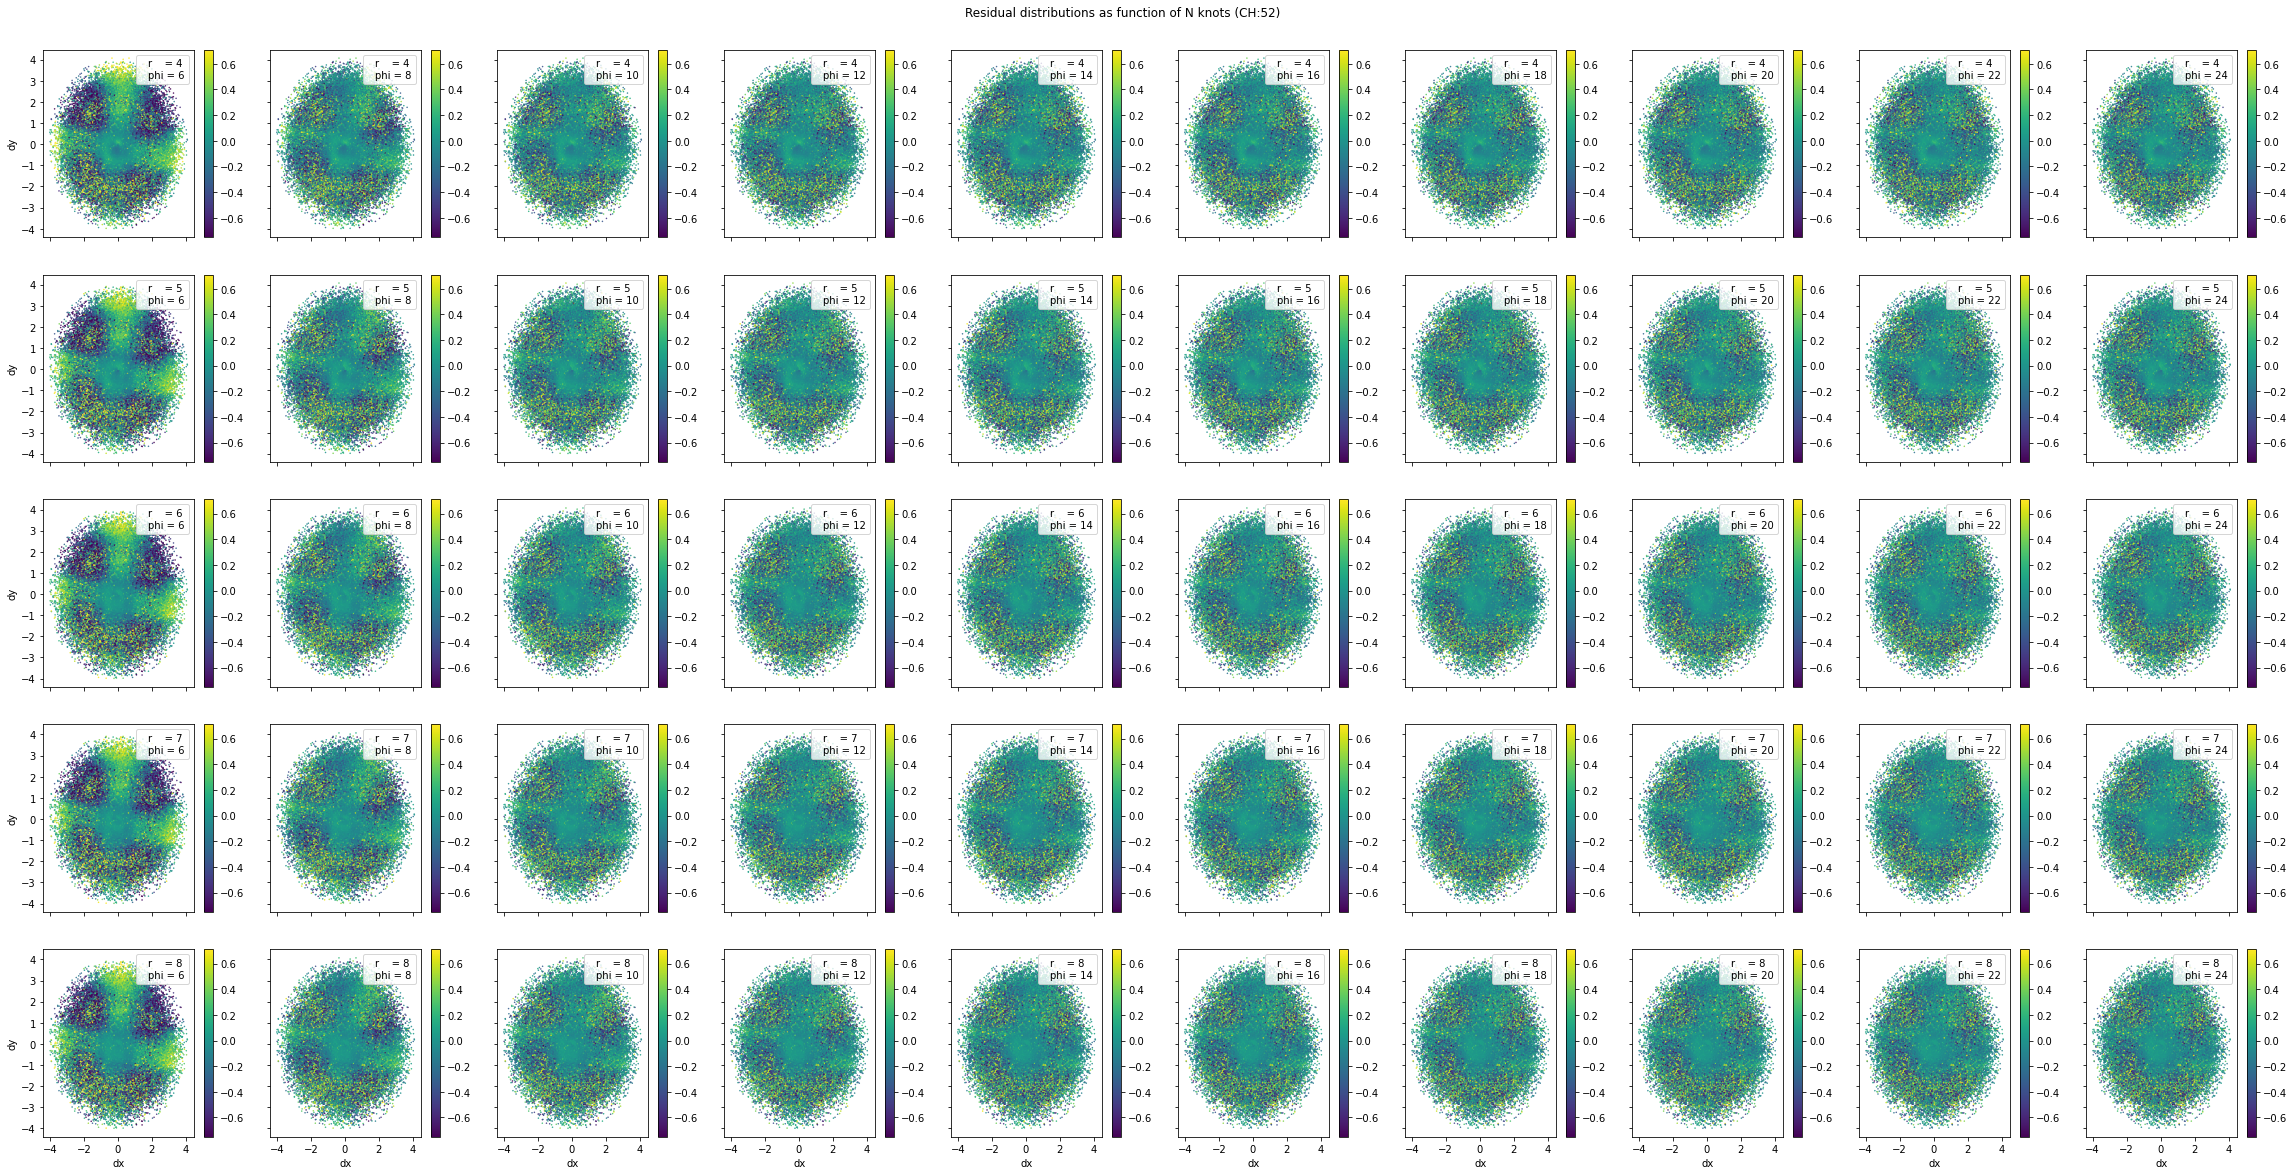

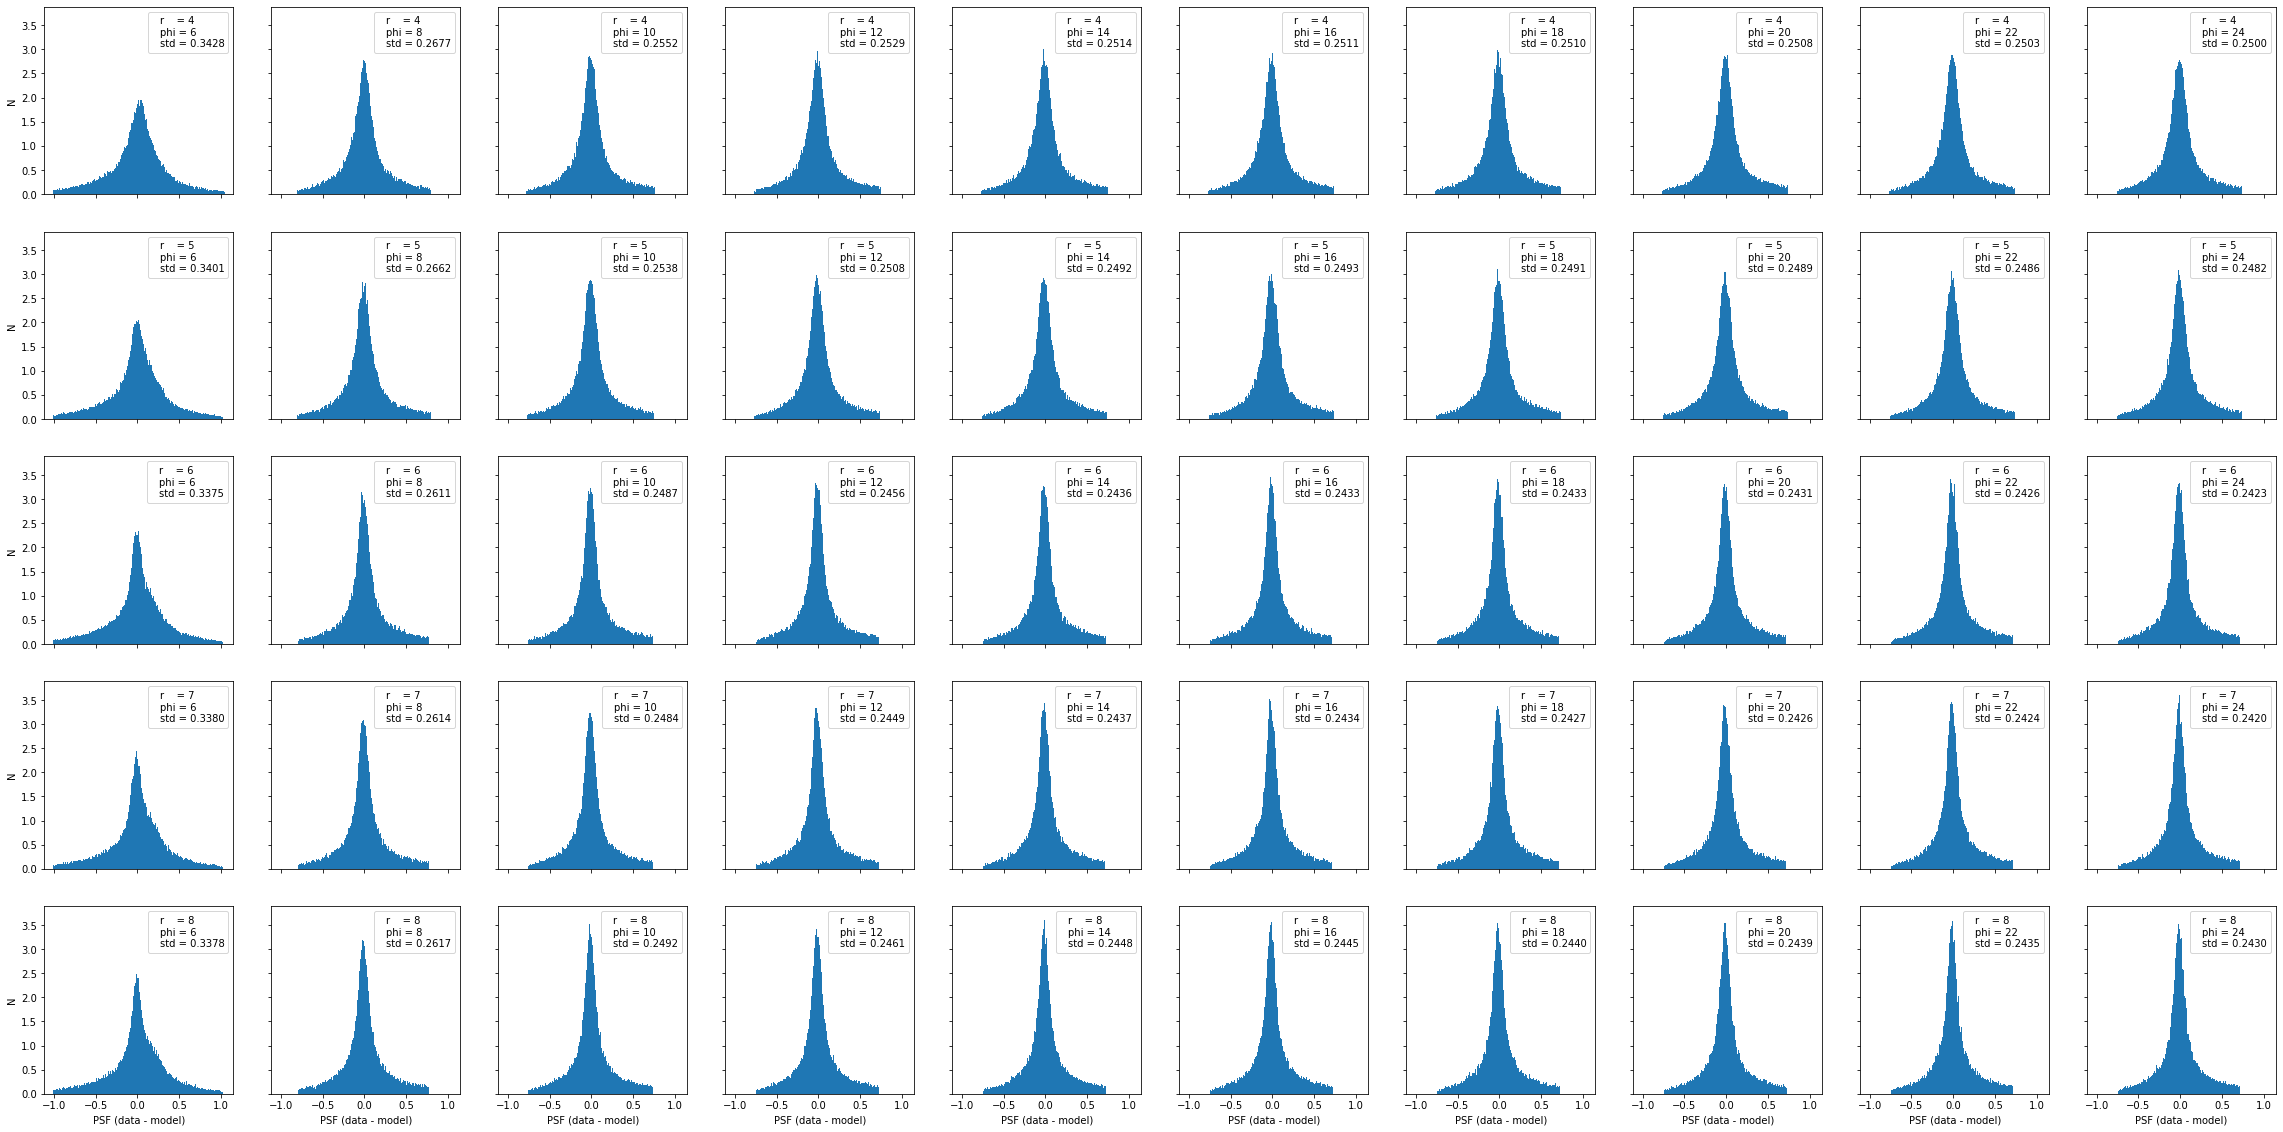

In [205]:
fig, ax = plt.subplots(len(rknots), len(phiknots),
                       figsize=(8*len(rknots),2*len(phiknots)),
                       sharex=True, sharey=True)
fig.suptitle("PSF model residuals as function of N knots (CH:52)", x=0.5, y=0.91)

fig2, ax2 = plt.subplots(len(rknots), len(phiknots),
                         figsize=(8*len(rknots),2*len(phiknots)),
                         sharex=True, sharey=True)
fig.suptitle("Residual distributions as function of N knots (CH:52)", x=0.5, y=0.91)

for row in range(len(rknots)):
    for col in range(len(phiknots)):
        mask = psfs[row][col]['clip_mask']
        res = np.log10(psfs[row][col]['f_data']) - np.log10(psfs[row][col]['f_model'])
        if row == 0 and col == 0:
            vmin = np.percentile(res[mask], 3)
            vmax = np.percentile(res[mask], 97)
        cax = ax[row, col].scatter(
                psfs[row][col]['x_data'][mask],
                psfs[row][col]['y_data'][mask],
                c=res[mask],
                marker=".",
                s=1,
                vmin=vmin,
                vmax=vmax,
                label='r    = %i \nphi = %i' % (rknots[row], phiknots[col]),
            )
        ax[row, col].legend(frameon=True, loc="upper right", markerscale=0, handlelength=0)
        
        ax2[row, col].hist(res[mask], bins=1000, 
                           density=True,
                           label='r    = %i \nphi = %i \nstd = %.4f' % 
                           (rknots[row], phiknots[col], np.std(res[mask])))
        ax2[row, col].legend(frameon=True, loc="upper right", markerscale=0, handlelength=0)
        
        if col == 0:
            ax[row, col].set_ylabel('dy')
            ax2[row, col].set_ylabel('N')
        if row == len(rknots) - 1:
            ax[row, col].set_xlabel('dx')
            ax2[row, col].set_xlabel('PSF (data - model)')
            
        

        fig.colorbar(cax, ax=ax[row,col])
plt.show()